In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
%matplotlib inline

In [2]:
data = pd.read_csv("mushrooms.csv")
print(data.shape)
data.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [4]:
data['class']=data['class'].map({'p':0,'e':1})

In [5]:
data['class'].unique()

array([0, 1], dtype=int64)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null int64
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number 

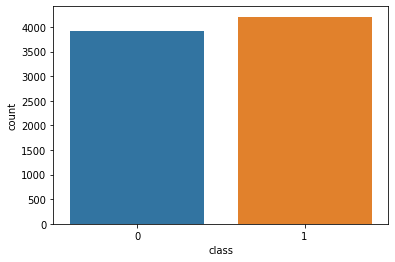

In [7]:
sns.countplot(data['class'])

# CAP-SHAPE

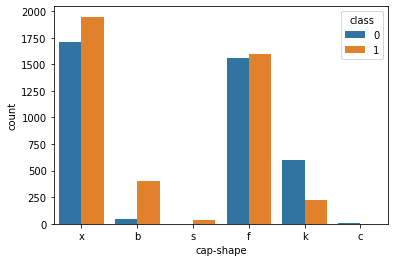

In [8]:
sns.countplot(x='cap-shape',hue='class',data=data)

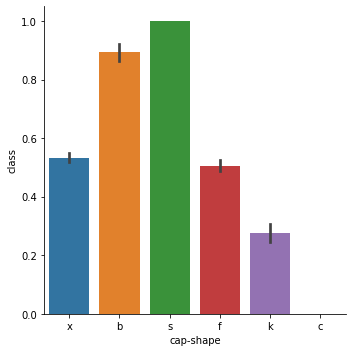

In [9]:
sns.catplot(x='cap-shape',y='class',data=data,kind='bar')

In [10]:
data['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [11]:
data.loc[data['cap-shape']=='c']

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5126,0,c,g,w,t,n,f,w,n,w,...,s,w,w,p,w,o,p,w,c,l
5508,0,c,y,w,t,n,f,w,n,w,...,s,w,w,p,w,o,p,w,c,l
7401,0,c,y,y,f,n,f,w,n,y,...,y,y,y,p,y,o,e,w,c,l
7706,0,c,y,y,f,n,f,w,n,w,...,y,y,y,p,y,o,e,w,c,l


Conclusion:- 1)A mushroom with sunken cap-shape is most likely to be edible. Although the sample size is very less(only 32)to conclude that sunken cap-shape cannot be poisonous.
2)Highest number of samples collected is of x(convex) and f(flat) and both has 50-50% chance of being poisonous and edible.
3)bell=b cap shape mushroom(5% of sample) has almost 90% chance of being edible.
4)K and c are most likly to be poisonous

Idea:

1)Reduce the number of variable. Keep x, f,merge(k+c),merge(b+c). Total 4 variable from 6 .


In [12]:
data['cap-shape']=data['cap-shape'].map({'x':'x','f':'f','k':'KC','c':'KC','b':'BC','c':'BC'})

In [13]:
data['cap-shape'].value_counts()

x     3656
f     3152
KC     828
BC     456
Name: cap-shape, dtype: int64

# cap-surface


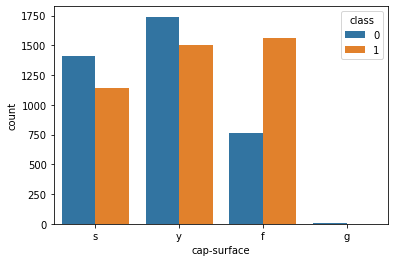

In [14]:
sns.countplot(x='cap-surface',hue='class',data=data)

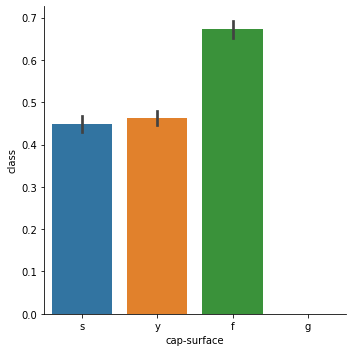

In [15]:
sns.catplot(x='cap-surface',y='class',data=data,kind='bar')

In [16]:
data['cap-surface'].value_counts()

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

In [17]:
data[data['cap-surface']=='g']

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5107,0,f,g,w,t,n,f,w,n,w,...,s,w,w,p,w,o,p,w,c,l
5126,0,BC,g,w,t,n,f,w,n,w,...,s,w,w,p,w,o,p,w,c,l
5128,0,BC,g,w,t,n,f,w,n,w,...,s,w,w,p,w,o,p,w,c,l
5717,0,KC,g,w,t,n,f,w,n,w,...,s,w,w,p,w,o,p,w,c,l



Conclusion:- 1)A mushroom with grooves cap-surface is most likely to be poisonous . Although the sample size is very less(only 4)to conclude that grooves cap-surface cannot be edible. 

2)y(scaly) and s(smooth)both has 45% chance of being edible.

3)fibrous=f cap surface mushroom has almost 65% chance of being edible. 

Idea:
1)Merge g with s. This will reduce one varaible(4 samples) and will not have any affect on model.
2)I was thinking of merging y with s. But I am not sure , as although y and s has same effect towards the edibility it may change the its effect on other variable when entering the model. We can check it later. 

In [18]:
data['cap-surface']=data['cap-surface'].map({'y':'y','s':'SG','g':'SG','f':'f'})

In [19]:
data['cap-surface'].value_counts()

y     3244
SG    2560
f     2320
Name: cap-surface, dtype: int64

# cap-color


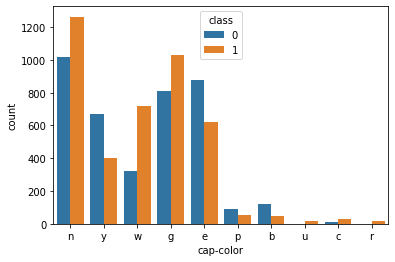

In [20]:
sns.countplot(x='cap-color',hue='class',data=data)

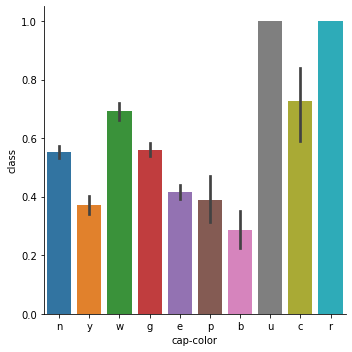

In [21]:
sns.catplot(x='cap-color',y='class',data=data,kind='bar')

In [22]:
data['cap-color'].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64

We will merge c+u+r(total 76) with w (count 1040) as w has the highest chance of being edible among all, thus will be able to reduce three colors having lowest count

Also merge p,b with y.Less chance of being edible.

In [23]:
data['cap-color']=data['cap-color'].map({'n':'n','g':'g','e':'e','y':'PBY','p':'PBY','b':'PBY','w':'CURW','c':'CURW','u':'CURW','r':'CURW'})

In [24]:
data['cap-color'].value_counts()

n       2284
g       1840
e       1500
PBY     1384
CURW    1116
Name: cap-color, dtype: int64

# bruises


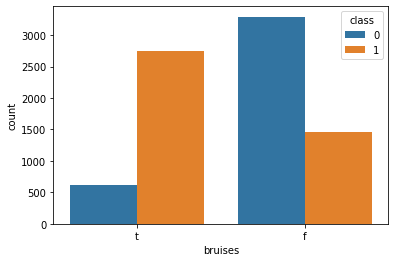

In [25]:
sns.countplot(x='bruises',hue='class',data=data)

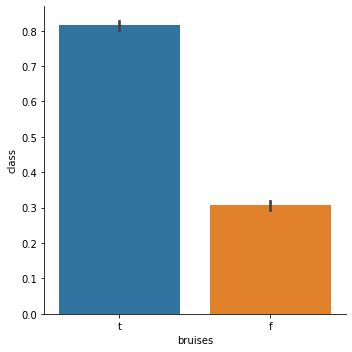

In [26]:
sns.catplot(x='bruises',y='class',data=data,kind='bar')

In [27]:
data['bruises'].value_counts()

f    4748
t    3376
Name: bruises, dtype: int64

Presence of bruises increases the chance of the mushroom being edible.

# odor


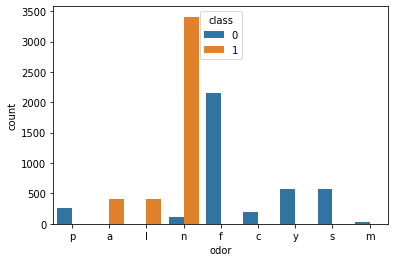

In [28]:
sns.countplot(x='odor',hue='class',data=data)

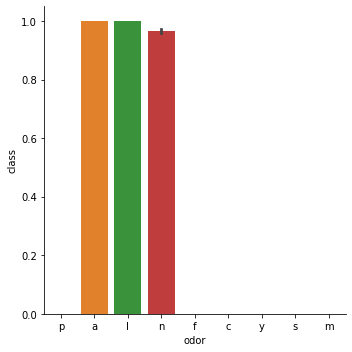

In [29]:
sns.catplot(x='odor',y='class',data=data,kind='bar')

In [30]:
data['odor'].value_counts()

n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64

From the countplot we can observe that p,f,c,y,s,m odor will be surely poisonous. We can club this together.
a and l are surely edible,club it together.n is 95% edible, we will keep it as seperate.

In [31]:
data['odor']=data['odor'].map({'n':'n','p':'POI','f':'POI','c':'POI','y':'POI','s':'POI','m':'POI','a':'EDI','l':'EDI'})

In [32]:
data['odor'].value_counts()

POI    3796
n      3528
EDI     800
Name: odor, dtype: int64

# gill-attachment


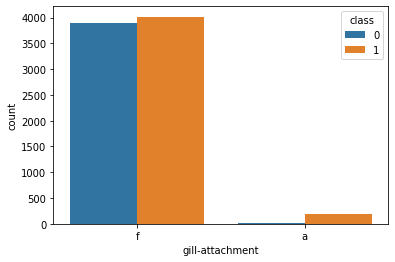

In [33]:
sns.countplot(x='gill-attachment',hue='class',data=data)

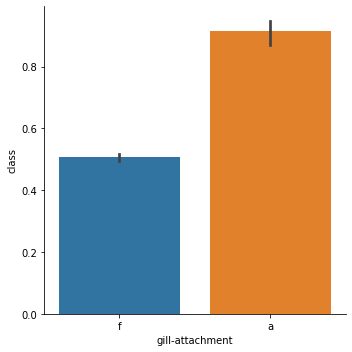

In [34]:
sns.catplot(x='gill-attachment',y='class',data=data,kind='bar')

In [35]:
data['gill-attachment'].value_counts()

f    7914
a     210
Name: gill-attachment, dtype: int64

In [36]:
data[(data['gill-attachment']=='a')&(data['class']==1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6038,1,BC,SG,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,n,c,l
6040,1,x,SG,n,f,n,a,c,b,o,...,s,o,o,p,n,o,p,n,v,l
6375,1,BC,SG,n,f,n,a,c,b,o,...,s,o,o,p,o,o,p,o,v,l
6424,1,x,SG,n,f,n,a,c,b,n,...,s,o,o,p,n,o,p,y,c,l
6434,1,x,SG,n,f,n,a,c,b,n,...,s,o,o,p,n,o,p,o,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8115,1,x,SG,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,v,l
8119,1,KC,SG,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,1,x,SG,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,1,f,SG,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l


In [37]:
data[(data['gill-attachment']=='a')&(data['class']==1)]['class'].count()

192

In [38]:
data[(data['gill-attachment']=='a')]['class'].count()

210

In [39]:
Edible_percent=data[(data['gill-attachment']=='a')&(data['class']==1)]['class'].sum()/data[(data['gill-attachment']=='a')]['class'].count()*100
print("The percentage of mushroom which are edible when gill is attached is:",Edible_percent)

The percentage of mushroom which are edible when gill is attached is: 91.42857142857143


If gill attachment is in free mode ,there is a 50% chance of the mushroom to be poisonous. However if the gill is attached then 91% 
of mushroom are edible.

# gill-spacing


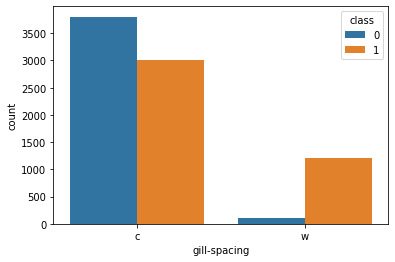

In [40]:
sns.countplot(x='gill-spacing',hue='class',data=data)

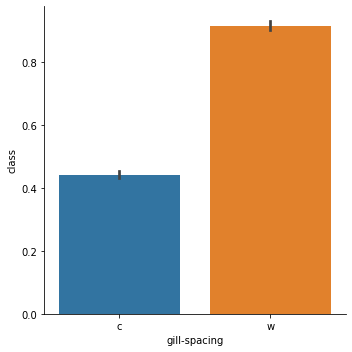

In [41]:
sns.catplot(x='gill-spacing',y='class',data=data,kind='bar')

In [42]:
data['gill-spacing'].value_counts()

c    6812
w    1312
Name: gill-spacing, dtype: int64

close gill-spacing has 40% chance to be edible. However if the spacing is crowded then chances that it is edible is very hight(~95%)

# gill-size


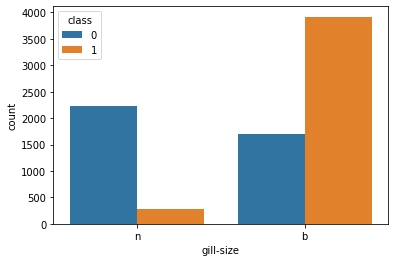

In [43]:
sns.countplot(x='gill-size',hue='class',data=data)

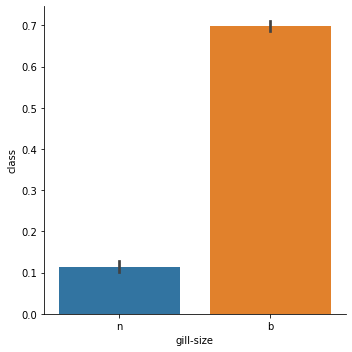

In [44]:
sns.catplot(x='gill-size',y='class',data=data,kind='bar')

In [45]:
data['gill-size'].value_counts()

b    5612
n    2512
Name: gill-size, dtype: int64

gill-size which is broad has 70% chances to be edible whereas narrow gill size has only 10% chances

# gill-color


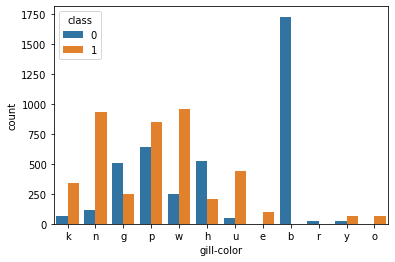

In [46]:
sns.countplot(x='gill-color',hue='class',data=data)

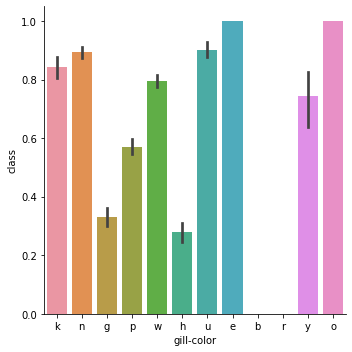

In [47]:
sns.catplot(x='gill-color',y='class',data=data,kind='bar')

In [48]:
data['gill-color'].value_counts()

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

1)b+r=BR, both has zero probability of edibilty.
2)o+e+k+n+u=OEKNU, have high probababilty of edibilty
3)g+h=GH, low probability of around ~30%
4)w+y=WY,high probability of around ~80%

In [49]:
data['gill-color']=data['gill-color'].map({'b':'BR','p':'p','w':'WY','n':'OEKNU','g':'GH','h':'GH','u':'OEKNU','k':'OEKNU','e':'OEKNU','y':'WY','o':'OEKNU','r':"BR"})

In [50]:
data['gill-color'].value_counts()

OEKNU    2108
BR       1752
p        1492
GH       1484
WY       1288
Name: gill-color, dtype: int64

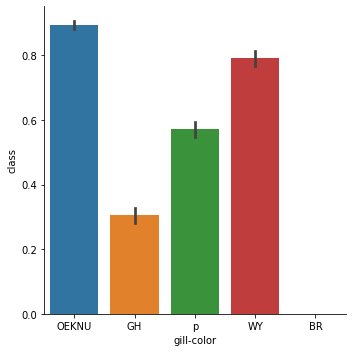

In [51]:
sns.catplot(x='gill-color',y='class',data=data,kind='bar')

# stalk-shape

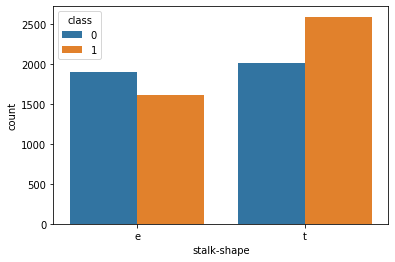

In [52]:
sns.countplot(x='stalk-shape',hue='class',data=data)

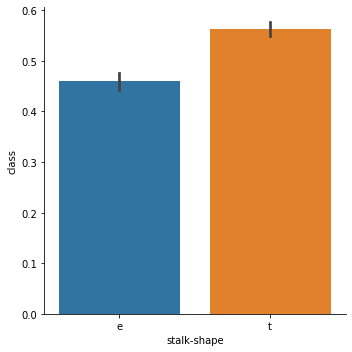

In [53]:
sns.catplot(x='stalk-shape',y='class',data=data,kind='bar')

In [54]:
data['stalk-shape'].value_counts()

t    4608
e    3516
Name: stalk-shape, dtype: int64

# stalk-root

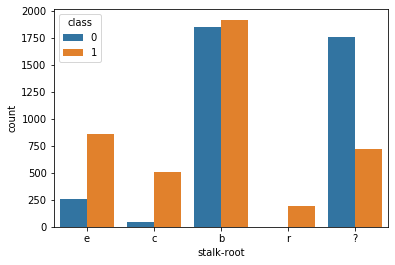

In [55]:
sns.countplot(x='stalk-root',hue='class',data=data)

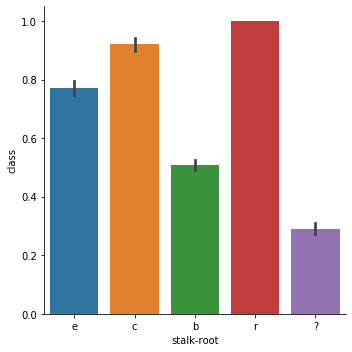

In [56]:
sns.catplot(x='stalk-root',y='class',data=data,kind='bar')

In [57]:
data['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [58]:
data['stalk-root']=data['stalk-root'].map({'r':'RC','c':'RC','b':'b','?':'missing','e':'e'})

In [59]:
data['stalk-root'].value_counts()

b          3776
missing    2480
e          1120
RC          748
Name: stalk-root, dtype: int64

# stalk-surface-above-ring

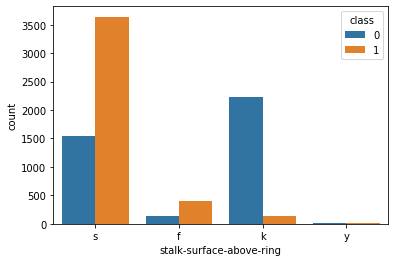

In [60]:
sns.countplot(x='stalk-surface-above-ring',hue='class',data=data)

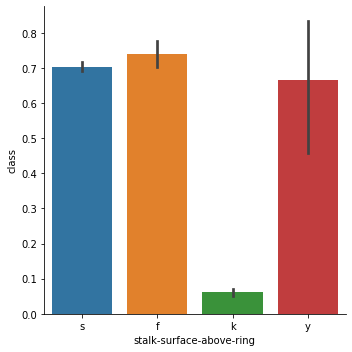

In [61]:
sns.catplot(x='stalk-surface-above-ring',y='class',data=data,kind='bar')

In [62]:
data['stalk-surface-above-ring'].value_counts()

s    5176
k    2372
f     552
y      24
Name: stalk-surface-above-ring, dtype: int64

In [63]:
data['stalk-surface-above-ring']=data['stalk-surface-above-ring'].map({'s':'SFY','f':'SFY','y':'SFY','k':'k'})

In [64]:
data['stalk-surface-above-ring'].value_counts()

SFY    5752
k      2372
Name: stalk-surface-above-ring, dtype: int64

# stalk-surface-below-ring

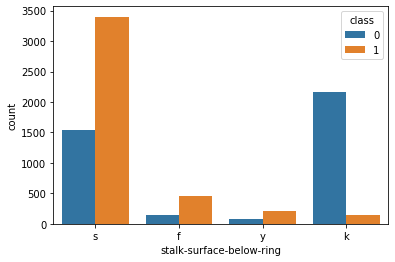

In [65]:
sns.countplot(x='stalk-surface-below-ring',hue='class',data=data)

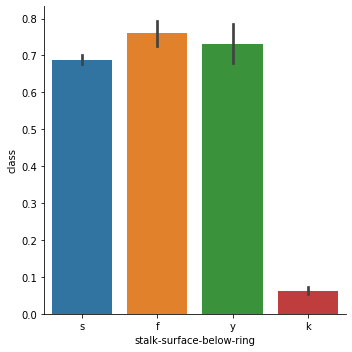

In [66]:
sns.catplot(x='stalk-surface-below-ring',y='class',data=data,kind='bar')

In [67]:
data['stalk-surface-below-ring'].value_counts()

s    4936
k    2304
f     600
y     284
Name: stalk-surface-below-ring, dtype: int64

In [68]:
data['stalk-surface-below-ring']=data['stalk-surface-below-ring'].map({'s':'SFY','f':'SFY','y':'SFY','k':'k'})

In [69]:
data['stalk-surface-below-ring'].value_counts()

SFY    5820
k      2304
Name: stalk-surface-below-ring, dtype: int64

# stalk-color-above-ring

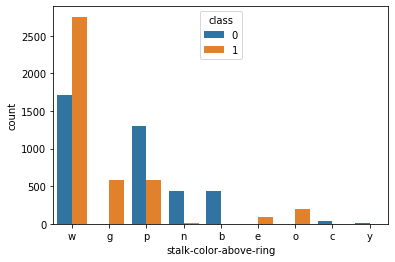

In [70]:
sns.countplot(x='stalk-color-above-ring',hue='class',data=data)

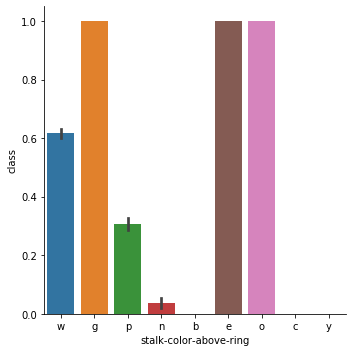

In [71]:
sns.catplot(x='stalk-color-above-ring',y='class',data=data,kind='bar')

In [72]:
data['stalk-color-above-ring'].value_counts()

w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: stalk-color-above-ring, dtype: int64

In [73]:
data['stalk-color-above-ring']=data['stalk-color-above-ring'].map({'e':'EOG','o':'EOG','g':'EOG','n':'NBCY','b':'NBCY','c':'NBCY','y':'NBCY','w':'w','p':'p'})

In [74]:
data['stalk-color-above-ring'].value_counts()

w       4464
p       1872
NBCY     924
EOG      864
Name: stalk-color-above-ring, dtype: int64

# stalk-color-below-ring

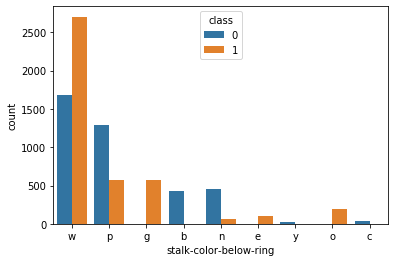

In [75]:
sns.countplot(x='stalk-color-below-ring',hue='class',data=data)

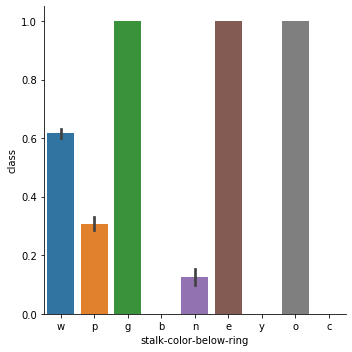

In [76]:
sns.catplot(x='stalk-color-below-ring',y='class',data=data,kind='bar')

In [77]:
data['stalk-color-below-ring'].value_counts()

w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: stalk-color-below-ring, dtype: int64

In [78]:
data['stalk-color-below-ring']=data['stalk-color-below-ring'].map({'e':'EOG','o':'EOG','g':'EOG','n':'BYCN','b':'BYCN','y':'BYCN','c':'BYCN','w':'w','p':'p'})

In [79]:
data['stalk-color-below-ring'].value_counts()

w       4384
p       1872
BYCN    1004
EOG      864
Name: stalk-color-below-ring, dtype: int64

# veil-type

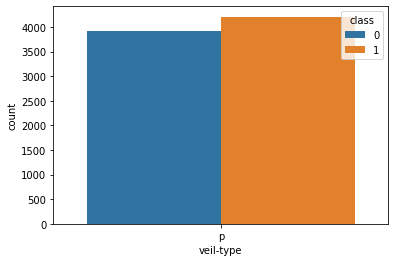

In [80]:
sns.countplot(x='veil-type',hue='class',data=data)

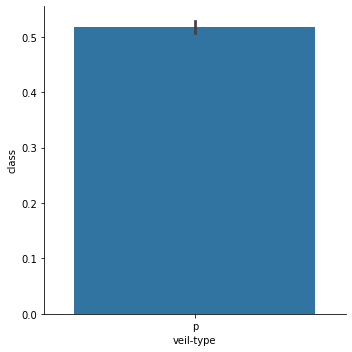

In [81]:
sns.catplot(x='veil-type',y='class',data=data,kind='bar')

In [82]:
data=data.drop(['veil-type'],axis = 1)

All values are p , so no impact on model. we can drop the column

# veil-color

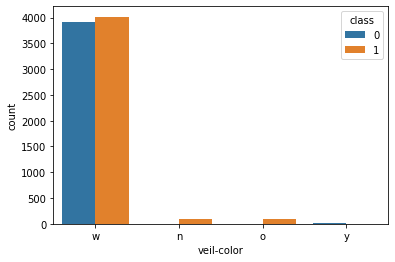

In [83]:
sns.countplot(x='veil-color',hue='class',data=data)

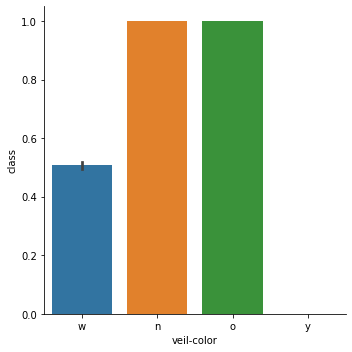

In [84]:
sns.catplot(x='veil-color',y='class',data=data,kind='bar')

In [85]:
data['veil-color'].value_counts()

w    7924
n      96
o      96
y       8
Name: veil-color, dtype: int64

Only 2.5% values are not w. So dropping it , will not impact our model

In [86]:
data=data.drop(['veil-color'],axis = 1)

# ring-number

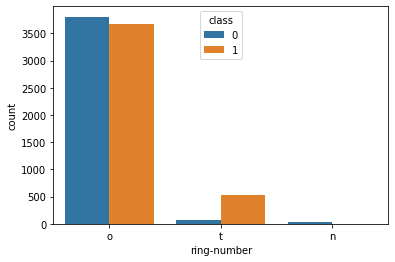

In [87]:
sns.countplot(x='ring-number',hue='class',data=data)

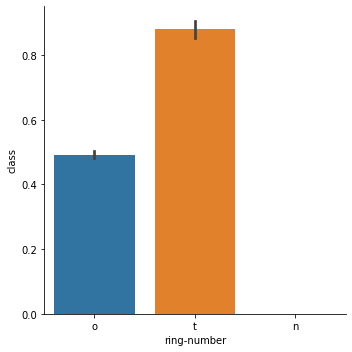

In [88]:
sns.catplot(x='ring-number',y='class',data=data,kind='bar')

In [89]:
data['ring-number'].value_counts()

o    7488
t     600
n      36
Name: ring-number, dtype: int64

In [90]:
data['ring-number']=data['ring-number'].map({'o':'ON','n':'ON','t':'t'})

In [91]:
data['ring-number'].value_counts()

ON    7524
t      600
Name: ring-number, dtype: int64

# ring-type

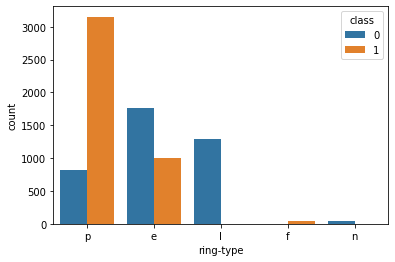

In [92]:
sns.countplot(x='ring-type',hue='class',data=data)

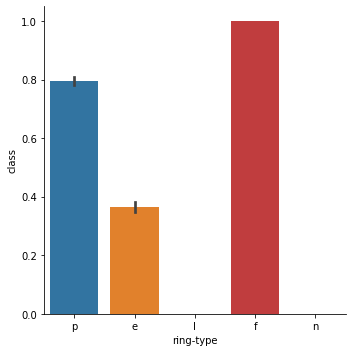

In [93]:
sns.catplot(x='ring-type',y='class',data=data,kind='bar')

In [94]:
data['ring-type'].value_counts()

p    3968
e    2776
l    1296
f      48
n      36
Name: ring-type, dtype: int64

In [95]:
data['ring-type']=data['ring-type'].map({'p':'PF','f':'PF','e':'e','l':'LN','n':'LN'})

In [96]:
data['ring-type'].value_counts()

PF    4016
e     2776
LN    1332
Name: ring-type, dtype: int64

# spore-print-color

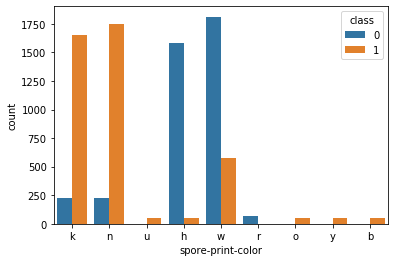

In [97]:
sns.countplot(x='spore-print-color',hue='class',data=data)

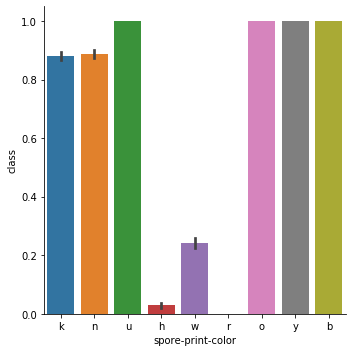

In [98]:
sns.catplot(x='spore-print-color',y='class',data=data,kind='bar')

In [99]:
data['spore-print-color'].value_counts()

w    2388
n    1968
k    1872
h    1632
r      72
b      48
y      48
u      48
o      48
Name: spore-print-color, dtype: int64

In [100]:
data['spore-print-color']=data['spore-print-color'].map({'o':'OYBU','y':'OYBU','b':'OYBU','u':'OYBU','h':'HR','r':'HR','w':'w','k':'KN','n':'KN'})

In [101]:
data['spore-print-color'].value_counts()

KN      3840
w       2388
HR      1704
OYBU     192
Name: spore-print-color, dtype: int64

# population

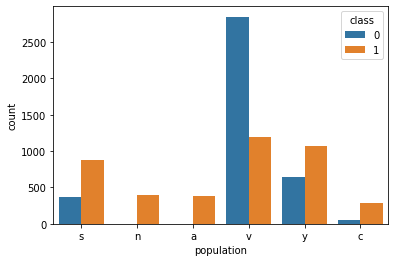

In [102]:
sns.countplot(x='population',hue='class',data=data)

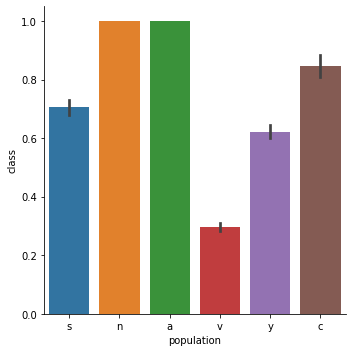

In [103]:
sns.catplot(x='population',y='class',data=data,kind='bar')

In [104]:
data['population'].value_counts()

v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64

In [105]:
data['population']=data['population'].map({'n':'NAC','a':'NAC','c':'NAC','s':'SY','y':'SY','v':'v'})

In [106]:
data['population'].value_counts()

v      4040
SY     2960
NAC    1124
Name: population, dtype: int64

# habitat

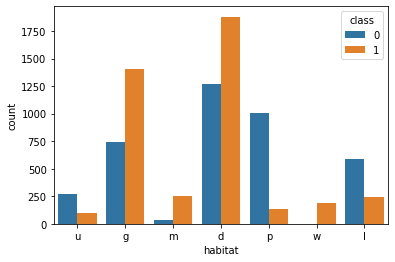

In [107]:
sns.countplot(x='habitat',hue='class',data=data)

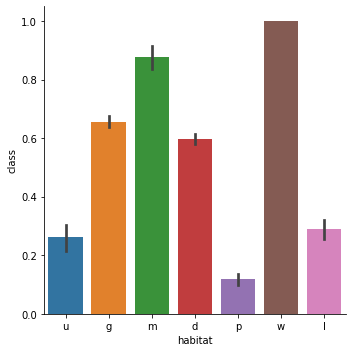

In [108]:
sns.catplot(x='habitat',y='class',data=data,kind='bar')

In [109]:
data['habitat'].value_counts()

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64

In [110]:
data['habitat']=data['habitat'].map({'g':'GD','d':'GD','u':'UL','l':'UL','m':'MW','w':'MW','p':'p'})

In [111]:
data['habitat'].value_counts()

GD    5296
UL    1200
p     1144
MW     484
Name: habitat, dtype: int64

In [112]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,SG,n,t,POI,f,c,n,OEKNU,...,e,SFY,SFY,w,w,ON,PF,KN,SY,UL
1,1,x,SG,PBY,t,EDI,f,c,b,OEKNU,...,RC,SFY,SFY,w,w,ON,PF,KN,NAC,GD
2,1,BC,SG,CURW,t,EDI,f,c,b,OEKNU,...,RC,SFY,SFY,w,w,ON,PF,KN,NAC,MW
3,0,x,y,CURW,t,POI,f,c,n,OEKNU,...,e,SFY,SFY,w,w,ON,PF,KN,SY,UL
4,1,x,SG,g,f,n,f,w,b,OEKNU,...,e,SFY,SFY,w,w,ON,e,KN,NAC,GD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,KC,SG,n,f,n,a,c,b,WY,...,missing,SFY,SFY,EOG,EOG,ON,PF,OYBU,NAC,UL
8120,1,x,SG,n,f,n,a,c,b,WY,...,missing,SFY,SFY,EOG,EOG,ON,PF,OYBU,v,UL
8121,1,f,SG,n,f,n,a,c,b,OEKNU,...,missing,SFY,SFY,EOG,EOG,ON,PF,OYBU,NAC,UL
8122,0,KC,y,n,f,POI,f,c,n,BR,...,missing,SFY,k,w,w,ON,e,w,v,UL


In [113]:
data_dum=data.copy()
#data_dum=data_dum.drop(columns=['class'],axis=0)
data_dum

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,SG,n,t,POI,f,c,n,OEKNU,...,e,SFY,SFY,w,w,ON,PF,KN,SY,UL
1,1,x,SG,PBY,t,EDI,f,c,b,OEKNU,...,RC,SFY,SFY,w,w,ON,PF,KN,NAC,GD
2,1,BC,SG,CURW,t,EDI,f,c,b,OEKNU,...,RC,SFY,SFY,w,w,ON,PF,KN,NAC,MW
3,0,x,y,CURW,t,POI,f,c,n,OEKNU,...,e,SFY,SFY,w,w,ON,PF,KN,SY,UL
4,1,x,SG,g,f,n,f,w,b,OEKNU,...,e,SFY,SFY,w,w,ON,e,KN,NAC,GD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,KC,SG,n,f,n,a,c,b,WY,...,missing,SFY,SFY,EOG,EOG,ON,PF,OYBU,NAC,UL
8120,1,x,SG,n,f,n,a,c,b,WY,...,missing,SFY,SFY,EOG,EOG,ON,PF,OYBU,v,UL
8121,1,f,SG,n,f,n,a,c,b,OEKNU,...,missing,SFY,SFY,EOG,EOG,ON,PF,OYBU,NAC,UL
8122,0,KC,y,n,f,POI,f,c,n,BR,...,missing,SFY,k,w,w,ON,e,w,v,UL


In [114]:
for i in data.columns:
    if (str(i)!=str('class')):
        data_dum=pd.get_dummies(data_dum,columns=[i],prefix=[i])
data_dum        

,class,cap-shape_BC,cap-shape_KC,cap-shape_f,cap-shape_x,cap-surface_SG,cap-surface_f,cap-surface_y,cap-color_CURW,cap-color_PBY,...,spore-print-color_KN,spore-print-color_OYBU,spore-print-color_w,population_NAC,population_SY,population_v,habitat_GD,habitat_MW,habitat_UL,habitat_p
0,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,1,0,0,0,1,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
2,1,1,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
3,0,0,0,0,1,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0
4,1,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
8120,1,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
8121,1,0,0,1,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


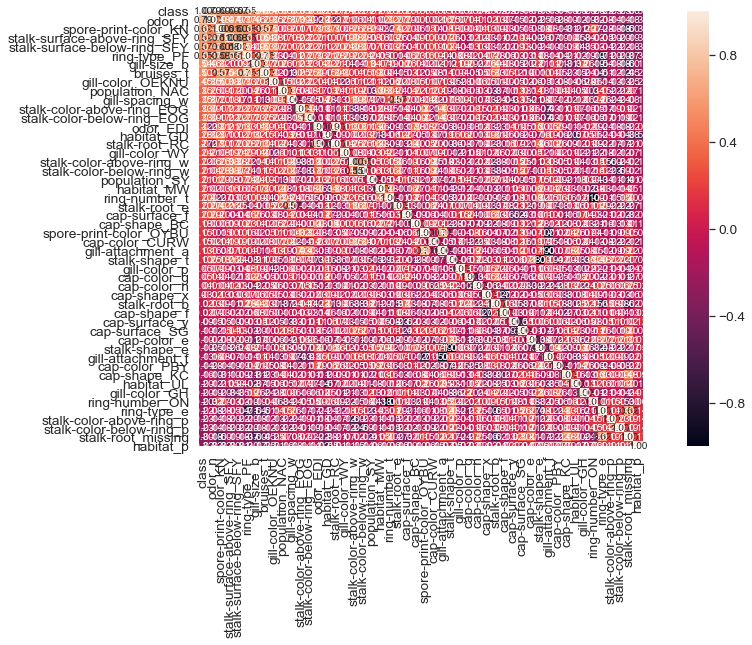

In [115]:
#saleprice correlation matrix
k = 50 #number of variables for heatmap
plt.figure(figsize=(16,8))
corrmat = data_dum.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'class')['class'].index
cm = np.corrcoef(data_dum[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [116]:
dataset=data_dum[cols]
dataset

,class,odor_n,spore-print-color_KN,stalk-surface-above-ring_SFY,stalk-surface-below-ring_SFY,ring-type_PF,gill-size_b,bruises_t,gill-color_OEKNU,population_NAC,...,cap-color_PBY,cap-shape_KC,habitat_UL,gill-color_GH,ring-number_ON,ring-type_e,stalk-color-above-ring_p,stalk-color-below-ring_p,stalk-root_missing,habitat_p
0,0,0,1,1,1,1,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,1,0,1,1,1,1,1,1,1,1,...,1,0,0,0,1,0,0,0,0,0
2,1,0,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,1,1,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
4,1,1,1,1,1,0,1,0,1,1,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,1,0,1,1,1,1,0,0,1,...,0,1,1,0,1,0,0,0,1,0
8120,1,1,0,1,1,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
8121,1,1,0,1,1,1,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
8122,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,1,1,0,0,1,0


In [117]:
Data_out=dataset['class']
input_data=dataset.drop(['class'],axis=1)

In [118]:
#data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(input_data,Data_out,stratify=Data_out,test_size=0.10)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.10)

In [119]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6579
Number of data points in test data: 813
Number of data points in cross validation data: 732


In [120]:
y_train.head()

2060    1
615     1
7043    0
6788    0
103     1
Name: class, dtype: int64

In [121]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)#it will count how many 0 and how many 1 present.
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in test data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[0])/test_len, "Class 1: ",int(test_distr[1])/test_len)
print(train_distr)

---------- Distribution of output variable in train data ----------
Class 0:  0.48198814409484725 Class 1:  0.5180118559051528
---------- Distribution of output variable in test data ----------
Class 0:  0.4821648216482165 Class 1:  0.5178351783517835
Counter({1: 3408, 0: 3171})


In [122]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    #print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    labels = [0,1]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    #print("-"*50, "Confusion matrix", "-"*50)
    #plt.figure(figsize=(10,5))
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    #plt.show()

    #print("-"*50, "Precision matrix", "-"*50)
    #plt.figure(figsize=(10,5))
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    #plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    #print("-"*50, "Recall matrix"    , "-"*50)
    #plt.figure(figsize=(10,5))
    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

In [123]:
from sklearn import metrics

# Random Model

In [124]:
test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]
#print(test_data_len)
#print(cv_data_len)
cv_predicted_y = np.zeros((cv_data_len,1))
#print(cv_predicted_y.shape)

In [125]:
rand_probs = np.random.rand(1,2)
#print(rand_probs)
#print(sum(sum(rand_probs)))
cv_predicted_y = ((rand_probs/sum(sum(rand_probs)))[0])
cv_predicted_y_12 = ((rand_probs/sum(sum(rand_probs))))
#print(cv_predicted_y)
#print(cv_predicted_y_12)

cv_predicted_y_1 = np.zeros((cv_data_len,1))
#print(cv_predicted_y_1)
#print(y_test.shape)


In [126]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Log loss on Cross Validation Data using Random Model 0.8501503554716823
Log loss on Test Data using Random Model 0.8977258059812845
Sum of columns in precision matrix [1. 1.]


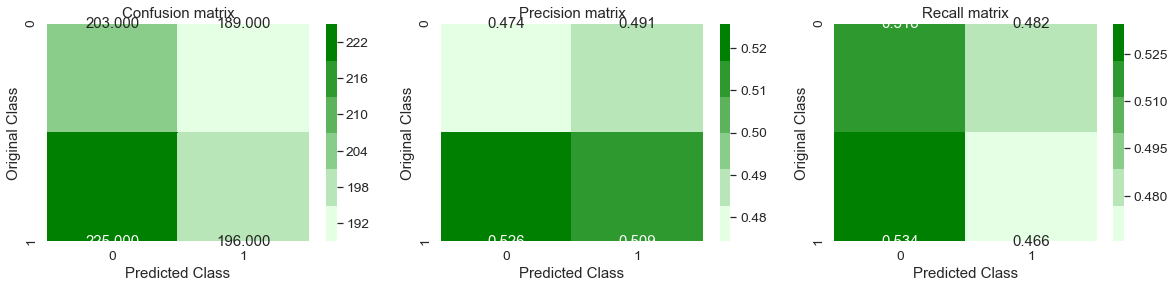

Sum of rows in precision matrix [1. 1.]
Scores using the AUC model 0.49170766881574474
MAE: 0.5092250922509225
MSE: 0.5092250922509225
RMSE: 0.7136000926645978


In [127]:
test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,2))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,2)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))
#print(cv_predicted_y.shape)
#print(y_cv.shape)

# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,2))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,2)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))


predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)
print("Scores using the AUC model",roc_auc_score(y_test,predicted_y))
print('MAE:', metrics.mean_absolute_error(y_test, predicted_y))
print('MSE:', metrics.mean_squared_error(y_test, predicted_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_y)))
#print(cv_predicted_y)
#print(test_predicted_y.shape)
#print(predicted_y)

# Logistic Regression with hyperparameter tuning


For values of alpha =  1e-05 The log loss is: 0.004216443276056526
For values of alpha =  0.0001 The log loss is: 0.005873293318180469
For values of alpha =  0.001 The log loss is: 0.02073450983235654
For values of alpha =  0.01 The log loss is: 0.049905003027029576
For values of alpha =  0.1 The log loss is: 0.10219418672193141
For values of alpha =  1 The log loss is: 0.16998114966766836
For values of alpha =  10 The log loss is: 0.1888870362892735


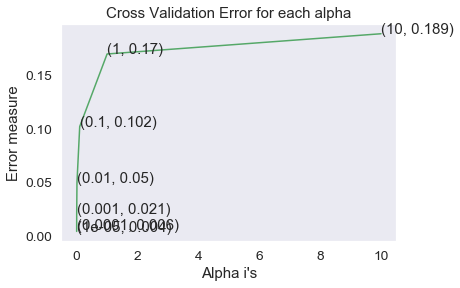

For values of best alpha =  1e-05 The train log loss is: 0.003036490892011233
For values of best alpha =  1e-05 The test log loss is: 0.004216443276056526
Total number of data points : 813
Scores using the AUC model 1.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0
Sum of columns in precision matrix [1. 1.]


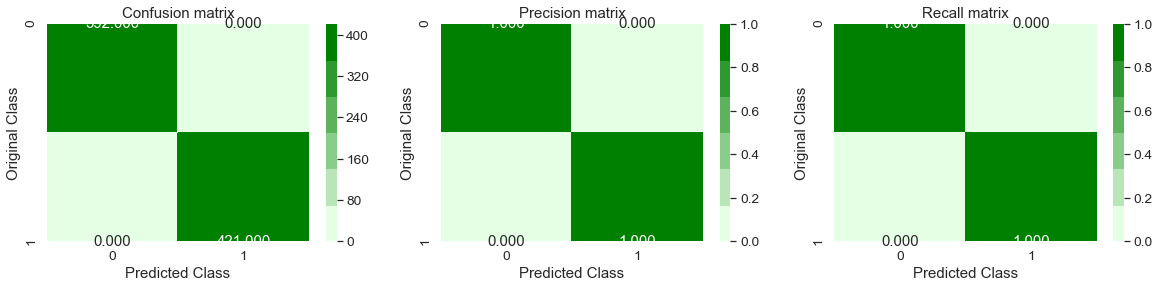

Sum of rows in precision matrix [1. 1.]


In [128]:
from sklearn.linear_model import SGDClassifier
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
print("Scores using the AUC model",roc_auc_score(y_test,predicted_y))
print('MAE:', metrics.mean_absolute_error(y_test, predicted_y))
print('MSE:', metrics.mean_squared_error(y_test, predicted_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_y)))

plot_confusion_matrix(y_test, predicted_y)

# Linear SVM with hyperparameter tuning


For values of alpha =  1e-05 The log loss is: 0.007512675029253807
For values of alpha =  0.0001 The log loss is: 0.012146061716670972
For values of alpha =  0.001 The log loss is: 0.025042697007256687
For values of alpha =  0.01 The log loss is: 0.07184611699132487
For values of alpha =  0.1 The log loss is: 0.34984551970886096
For values of alpha =  1 The log loss is: 0.6925109208719589
For values of alpha =  10 The log loss is: 0.6925109208729624


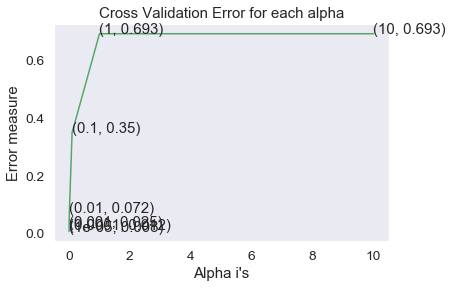

For values of best alpha =  1e-05 The train log loss is: 0.006213006832564858
For values of best alpha =  1e-05 The test log loss is: 0.007512675029253807
Total number of data points : 813
Scores using the AUC model 0.9987244897959184
MAE: 0.0012300123001230013
MSE: 0.0012300123001230013
RMSE: 0.035071531191594715
Sum of columns in precision matrix [1. 1.]


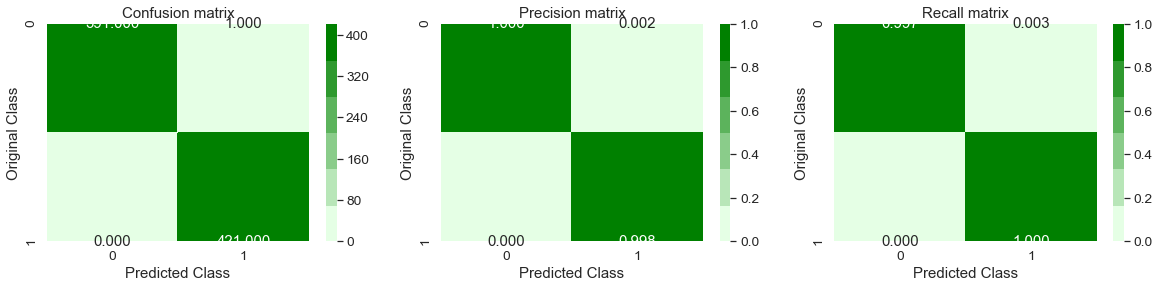

Sum of rows in precision matrix [1. 1.]


In [129]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
print("Scores using the AUC model",roc_auc_score(y_test,predicted_y))
print('MAE:', metrics.mean_absolute_error(y_test, predicted_y))
print('MSE:', metrics.mean_squared_error(y_test, predicted_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_y)))

plot_confusion_matrix(y_test, predicted_y)

# XGBOOST

[0]	train-logloss:0.673715	valid-logloss:0.673814
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.514976	valid-logloss:0.515749
[20]	train-logloss:0.402005	valid-logloss:0.4032
[30]	train-logloss:0.318481	valid-logloss:0.32005
[40]	train-logloss:0.255059	valid-logloss:0.256844
[50]	train-logloss:0.206189	valid-logloss:0.20839
[60]	train-logloss:0.167768	valid-logloss:0.170205
[70]	train-logloss:0.136951	valid-logloss:0.139855
[80]	train-logloss:0.112338	valid-logloss:0.11545
[90]	train-logloss:0.092611	valid-logloss:0.095894
[100]	train-logloss:0.076711	valid-logloss:0.080119
[110]	train-logloss:0.063844	valid-logloss:0.067368
[120]	train-logloss:0.053388	valid-logloss:0.056892
[130]	train-logloss:0.045023	valid-logloss:0.048612
[140]	train-logloss:0.038381	valid-logloss:0.042017
[150]	train-logloss:0.032803	valid-logloss:0.036311
[160]	train-logloss:0.028287	vali

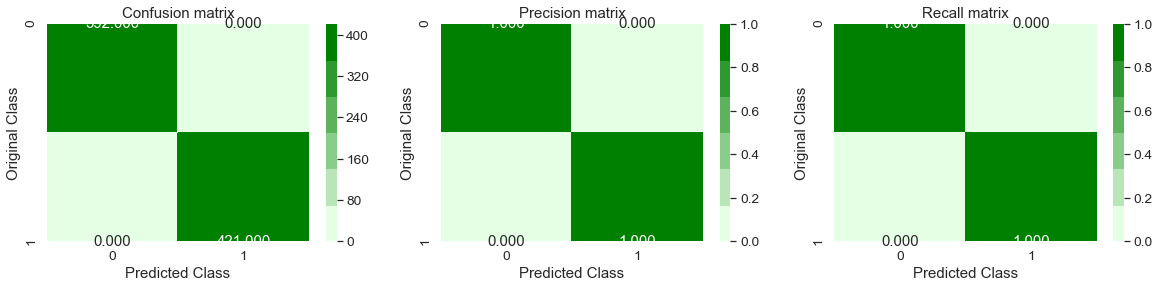

Sum of rows in precision matrix [1. 1.]


In [130]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
print("Scores using the AUC model",roc_auc_score(y_test,predicted_y))
print('MAE:', metrics.mean_absolute_error(y_test, predicted_y))
print('MSE:', metrics.mean_squared_error(y_test, predicted_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_y)))

plot_confusion_matrix(y_test, predicted_y)

# Random Forest

In [131]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(X_train, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(X_train, y_train)
        sig_clf_probs = sig_clf.predict_proba(X_cv)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


for n_estimators = 100 and max depth =  5
Log Loss : 0.008370480073607082
for n_estimators = 100 and max depth =  10
Log Loss : 0.001133791889318538
for n_estimators = 200 and max depth =  5
Log Loss : 0.008421819702575757
for n_estimators = 200 and max depth =  10
Log Loss : 0.0010981409148431104
for n_estimators = 500 and max depth =  5
Log Loss : 0.007855906910289048
for n_estimators = 500 and max depth =  10
Log Loss : 0.001141487200941699
for n_estimators = 1000 and max depth =  5
Log Loss : 0.007443946432735591
for n_estimators = 1000 and max depth =  10
Log Loss : 0.0011788273500979334
for n_estimators = 2000 and max depth =  5
Log Loss : 0.007203905492023098
for n_estimators = 2000 and max depth =  10
Log Loss : 0.0011738765888680647
For values of best estimator =  200 The train log loss is: 0.0009155234724744018
For values of best estimator =  200 The cross validation log loss is: 0.00109814091484311
For values of best estimator =  200 The test log loss is: 0.00092785767645846

In [132]:
predicted_y =np.argmax(predict_y,axis=1)
print("Scores using the AUC model",roc_auc_score(y_test,predicted_y))
print('MAE:', metrics.mean_absolute_error(y_test, predicted_y))
print('MSE:', metrics.mean_squared_error(y_test, predicted_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_y)))

Scores using the AUC model 1.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0
